### Micro-Credit Defaulter Model

Problem Statement:Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

### Importing Liberary

In [1]:
#data lib
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


#metrics

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#save

import warnings
warnings.filterwarnings('ignore')
import pickle

### Importing dataset

In [2]:
data=pd.read_csv('Data_file.csv')
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


### Overview

In [3]:
data.shape

(209593, 37)

Dataset contain 209593 observations and 36 features.

Feature ['Unnamed: 0'] having id & ['msisdn'] have mobile number so both unique identity featues so we can simply remove it.

In [4]:
data.drop(columns=['Unnamed: 0','msisdn'],inplace=True)

In [5]:
pd.set_option('max_columns',37)

### Duplicate Test

In [6]:
data.duplicated().sum()

31

In [7]:
data.drop_duplicates(inplace=True)

As we can see 31 duplicate observation found in dataset and removed now.

In [8]:
data.nunique()

label                        2
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback30                 1363
payback9

feature 'pcircle' is same for all observations so it wouldn't add any weightage .so we can remove it. 

In [9]:
del data['pcircle']

### Null & Data Type Test

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209562 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209562 non-null  int64  
 1   aon                   209562 non-null  float64
 2   daily_decr30          209562 non-null  float64
 3   daily_decr90          209562 non-null  float64
 4   rental30              209562 non-null  float64
 5   rental90              209562 non-null  float64
 6   last_rech_date_ma     209562 non-null  float64
 7   last_rech_date_da     209562 non-null  float64
 8   last_rech_amt_ma      209562 non-null  int64  
 9   cnt_ma_rech30         209562 non-null  int64  
 10  fr_ma_rech30          209562 non-null  float64
 11  sumamnt_ma_rech30     209562 non-null  float64
 12  medianamnt_ma_rech30  209562 non-null  float64
 13  medianmarechprebal30  209562 non-null  float64
 14  cnt_ma_rech90         209562 non-null  int64  
 15  

All features are numeric except 'pdate'.. its a date feature so we need to treat it. 

No null values are there in dataset.

In [11]:
data['pdate']=data['pdate'].astype('datetime64')

In [12]:
data['pdate_day']=data['pdate'].dt.day
data['pdate_month']=data['pdate'].dt.month
data['pdate_year']=data['pdate'].dt.year

Feature pdate contains date as model cant process data as its so i have extracted day/month/year in seperate columns.

In [13]:
data.nunique()

label                        2
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback30                 1363
payback9

#as 'pdate' have been splitted so we can removed it and feature 'pdate_year' have same year data so removing it as well.  

In [14]:
data.drop(columns=['pdate','pdate_year'],inplace=True)

In [15]:
data.isna().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate_day               0
pdate_month             0
dtype: int64

All features are numeric now & no null value in dataset.

### Describe

In [16]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
count,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000
mean,0.875297,8113.512796,5382.170031,6083.386523,2692.964058,3483.905668,3756.403389,3712.752058,2064.754512,3.978622,3737.907974,7705.599512,1813.078774,3852.497291,6.316341,7.717916,12398.010741,1864.864303,92.038696,262.616952,3750.049100,0.041501,0.045719,2.759226,17.953703,274.698489,0.054037,18.523497,23.647923,6.703238,0.046084,3.399125,4.321920,14.399514,6.797406
std,0.330383,75701.620014,9221.086606,10919.382966,4308.784971,5770.737718,53909.859829,53378.762010,2370.831005,4.256138,53647.573470,10139.952367,2070.904097,54010.348531,7.193605,12.590836,16858.386213,2081.714948,369.241324,4184.206206,53889.381122,0.397585,0.951456,2.554603,17.380433,4245.577376,0.218054,224.813949,26.470977,2.104003,0.200706,8.813867,10.308399,8.438943,0.741434
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,246.000000,42.480000,42.713250,280.800000,300.370000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.000000,0.000000,2317.000000,773.000000,14.620000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,527.000000,1470.465667,1500.000000,1083.940000,1334.400000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.955000,4.000000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.000000,7.000000
75%,1.000000,982.000000,7246.000000,7804.000000,3357.452500,4202.537500,7.000000,0.000000,2309.000000,5.000000,6.000000,10011.000000,1924.000000,83.000000,8.000000,8.000000,16000.000000,1924.000000,79.330000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.000000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.000000,8.000000


#### There are many outliers but as per model requirement we cant delete more then 8% data. so will remove top outliers using zscore.

### Heatmap-Correlation & multicollinearity

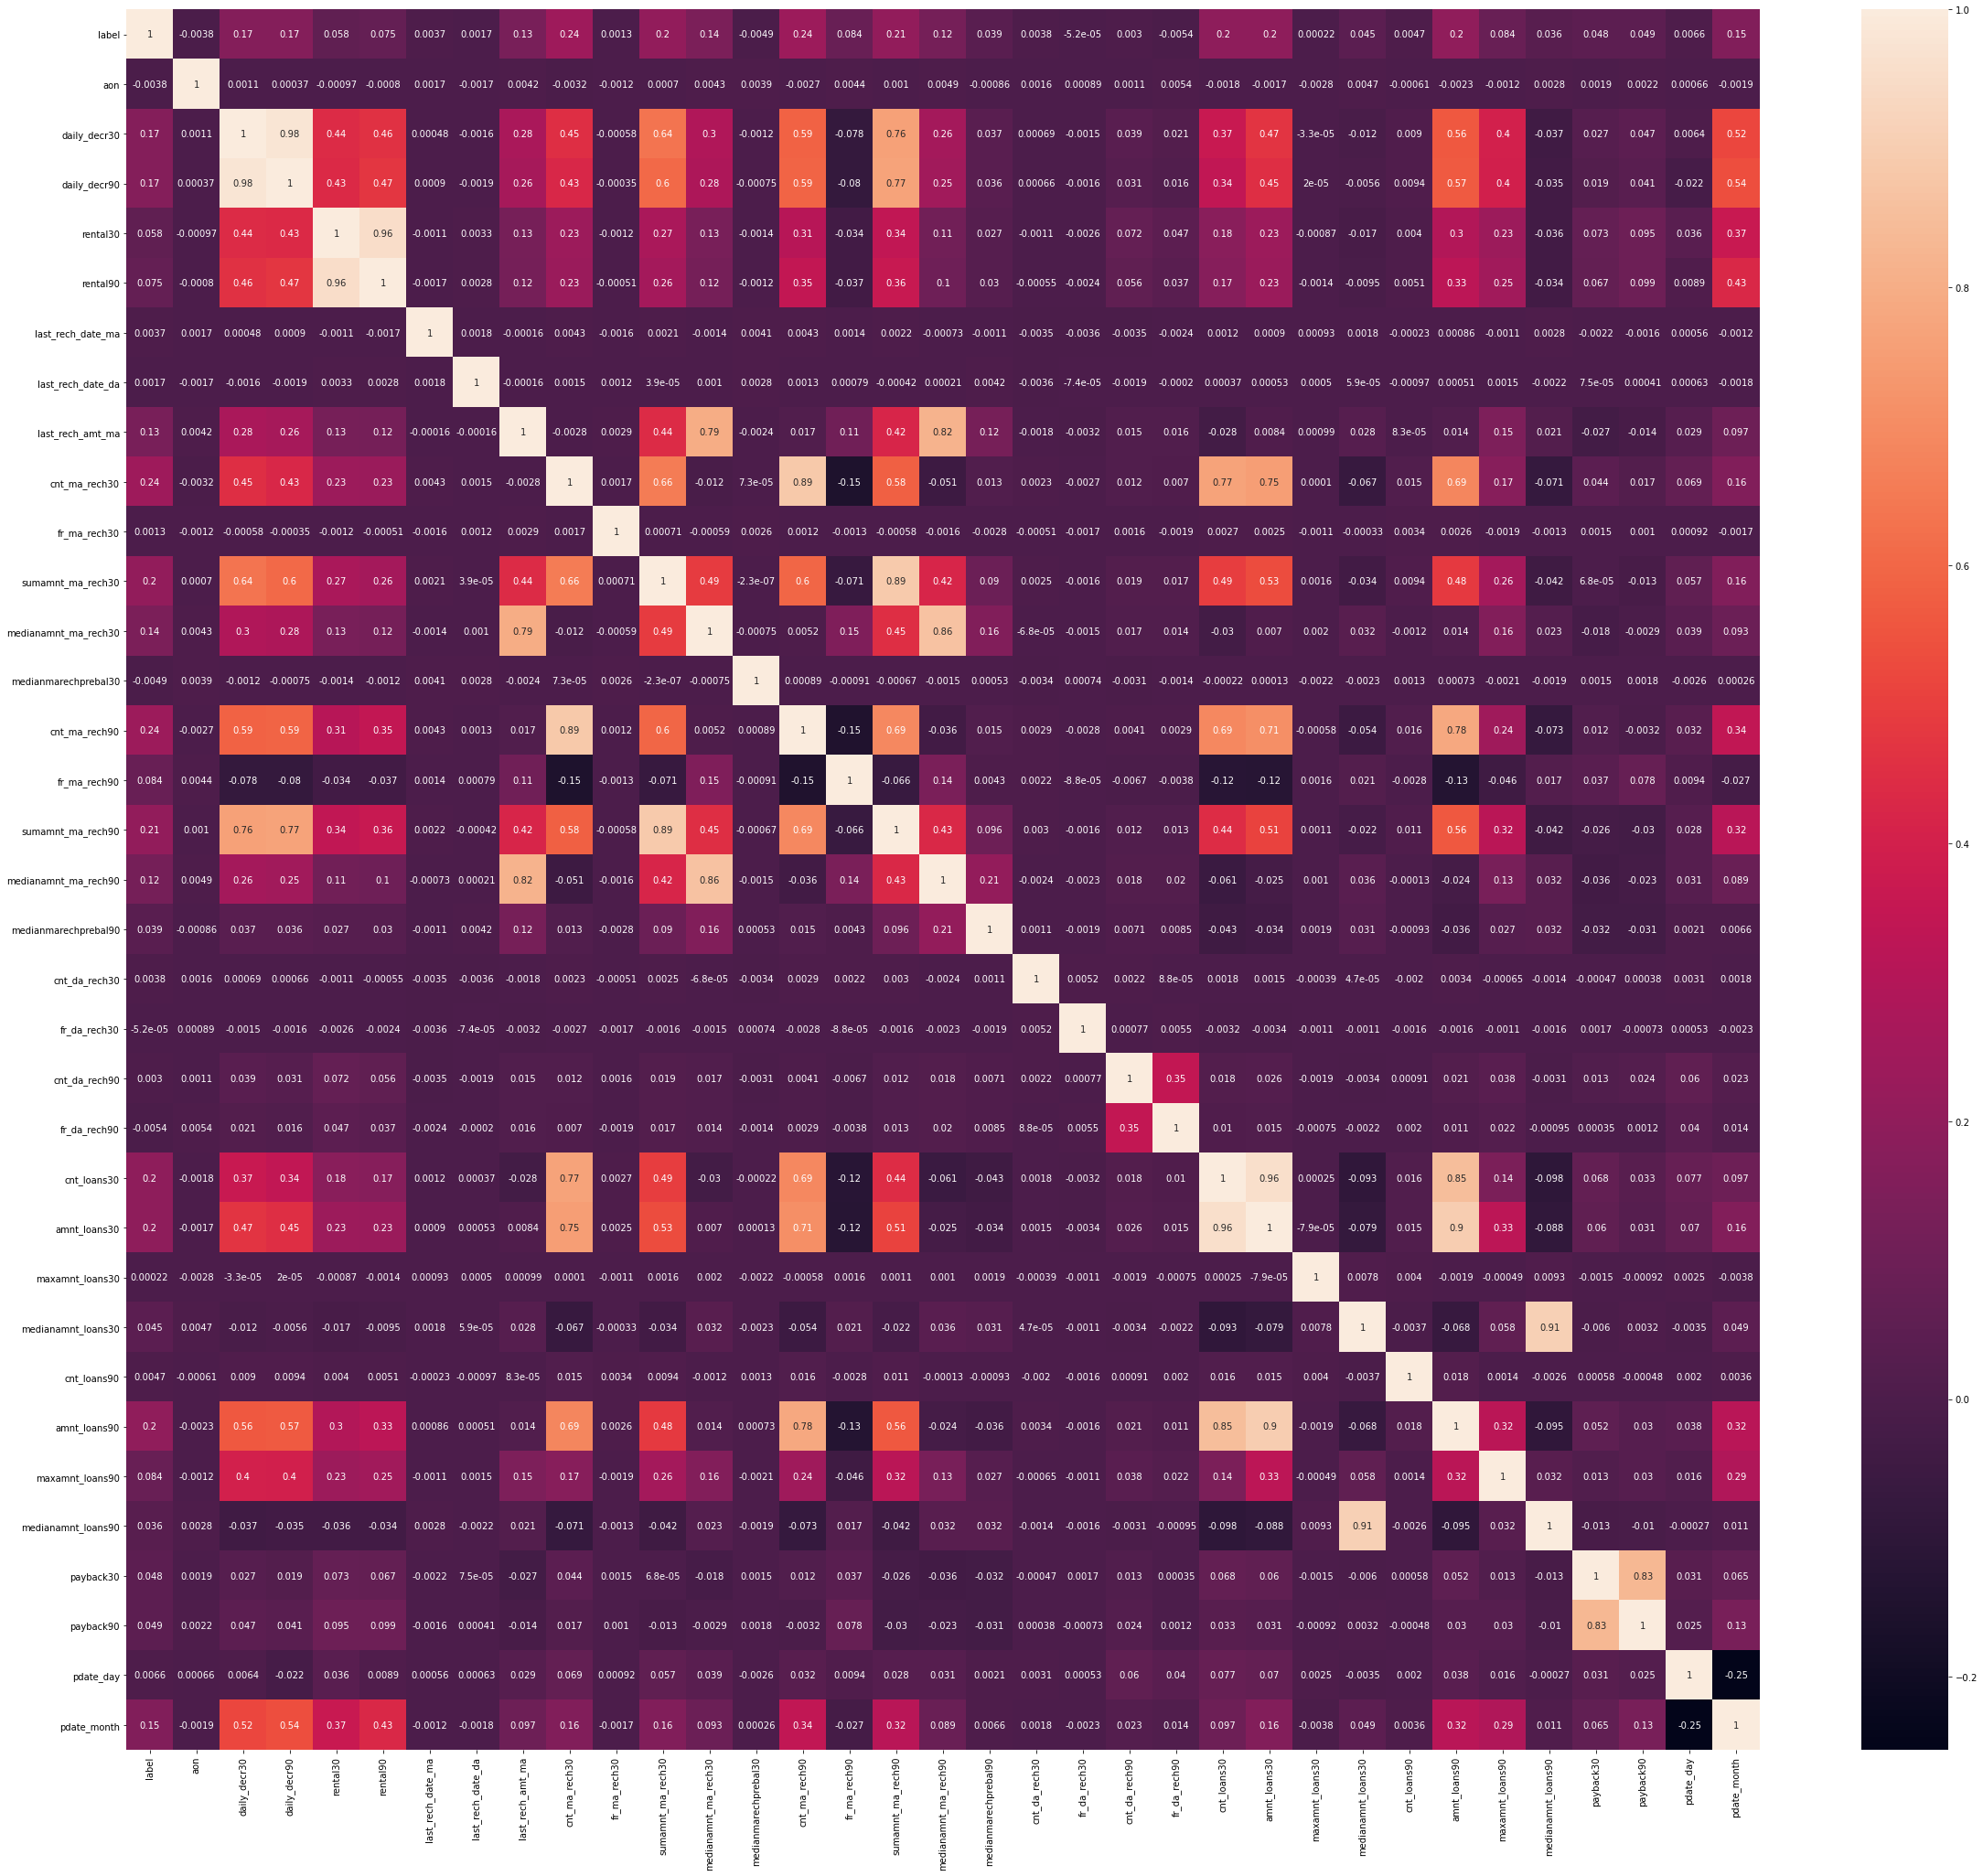

In [17]:
plt.figure(figsize=(40,35))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [18]:
data.drop(columns=['fr_da_rech90','medianmarechprebal30','aon','fr_da_rech30','maxamnt_loans30','fr_ma_rech30','cnt_da_rech90','last_rech_date_da','last_rech_date_ma','cnt_da_rech30','cnt_loans90'],inplace=True)

In [19]:
data.drop(columns=['daily_decr30','rental30'],inplace=True)

In [20]:
data.shape

(209562, 22)

### Feature Selection

As we have many features in dataset and some features have very less or no relation with target label. so we will apply feature selection to select best features.
I will use sklearn tool SelectKBest and function-f_classif.

In [21]:
from sklearn.feature_selection import SelectKBest,f_classif

In [22]:
X=data.drop(columns=['label'])
y=data.label

In [23]:
best_feature=SelectKBest(score_func=f_classif)
fit=best_feature.fit(X,y)

scores=pd.DataFrame(fit.scores_)
scores['feature_name']=X.columns
scores.columns=['score','column_name']
scores.sort_values(by=['score'],ascending=False).reset_index()

,index,score,column_name
0,3,12484.659526,cnt_ma_rech30
1,6,12382.298930,cnt_ma_rech90
2,8,9252.518278,sumamnt_ma_rech90
3,4,8975.282225,sumamnt_ma_rech30
4,14,8699.736283,amnt_loans90
5,12,8472.197209,amnt_loans30
6,11,8383.935979,cnt_loans30
7,0,5940.760091,daily_decr90
8,20,5138.623467,pdate_month
9,5,4266.025692,medianamnt_ma_rech30


In [24]:
New_X=data[scores.nlargest(17,'score').column_name]

In [25]:
new_data=pd.concat([New_X,y],axis=1)

In [26]:
new_data.reset_index(inplace=True)

### Distribution Plot

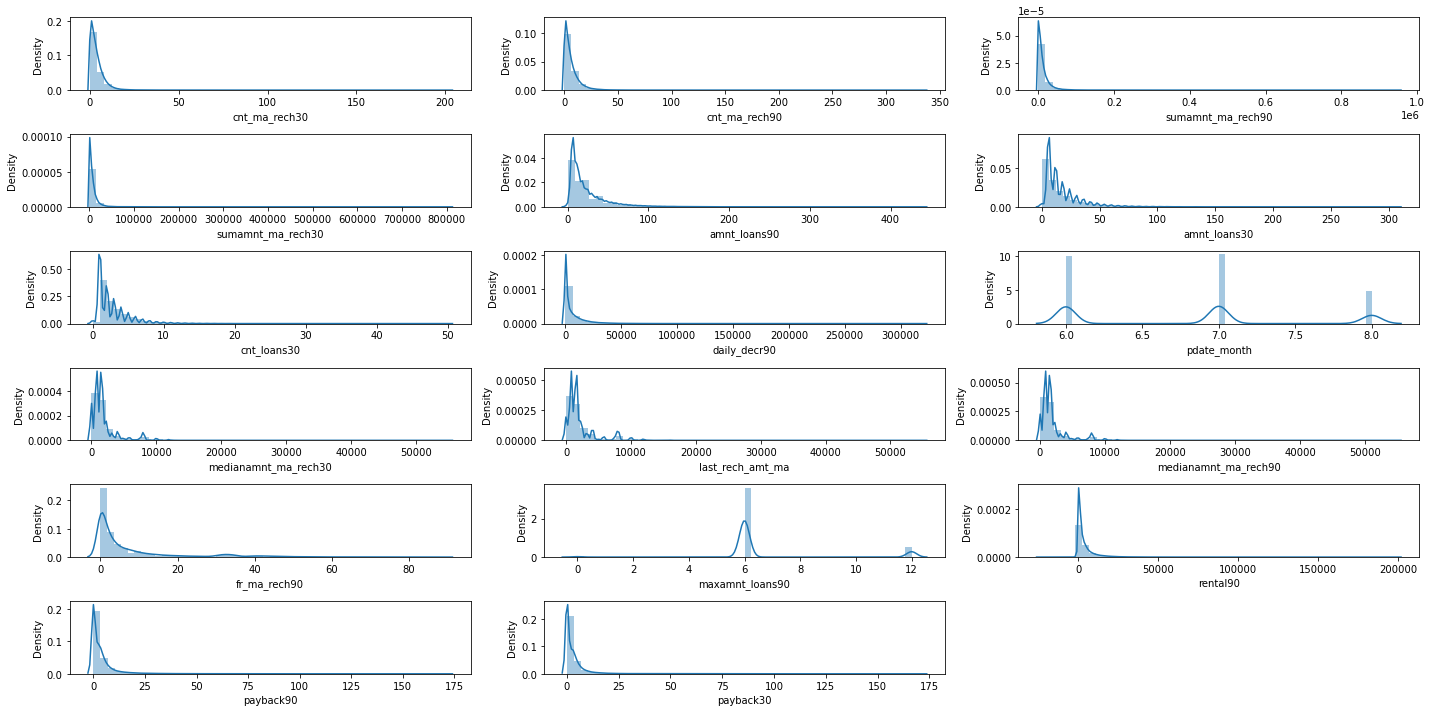

In [27]:
plt.figure(figsize=(20,10))

plotnumber=1

for col in New_X :
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(New_X[col])
        
    plotnumber+=1
    
plt.tight_layout()

As we can clealy see all features having outliers and right skewness. so we will apply z_score method here to remove outliers.

### Outliers Removal

In [28]:
from scipy.stats import zscore

In [29]:
del new_data['index']

In [30]:
z=zscore(new_data)

In [31]:
z_data=new_data[(z<=3.7).all(axis=1)]

Generally we takes z value as 3 but as we have limit here to remove outliers upto 8% so setting zscore as 3.7.

In [32]:
print(new_data.shape)
print(z_data.shape)

(209562, 18)
(191232, 18)


### Data Imbalance Testing

<AxesSubplot:xlabel='label', ylabel='count'>

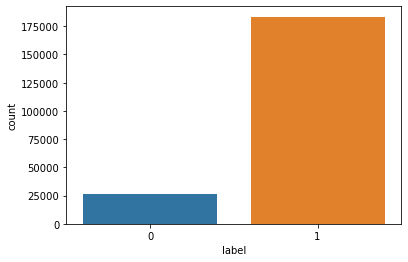

In [33]:
sns.countplot(data['label'])

Data is imbalanced so need to apply resamplig to balance data.

In [34]:
from sklearn.utils import resample

In [35]:
label1=data[data['label']==1]
label0=data[data['label']==0]

In [36]:
upsample=resample(label0,n_samples=150000,random_state=91)

In [37]:
label1.shape

(183429, 22)

In [38]:
upsample.shape

(150000, 22)

In [39]:
up_data=pd.concat([label1,upsample],axis=0)

<AxesSubplot:xlabel='label', ylabel='count'>

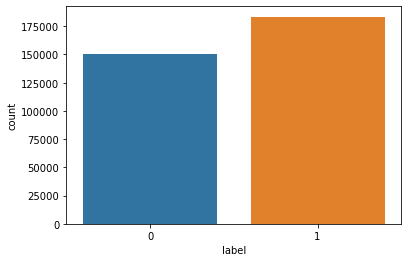

In [40]:
sns.countplot(up_data['label'])

In [41]:
up_data.head(3)

,label,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
1,1,12124.750,3691.26,5787,1,5787.0,5787.0,1,0,5787,5787.0,61.04,1,12,0.0,12,12,0.0,0.0,0.0,10,8
2,1,1398.000,900.13,1539,1,1539.0,1539.0,1,0,1539,1539.0,66.32,1,6,0.0,6,6,0.0,0.0,0.0,19,8
3,1,21.228,159.42,947,0,0.0,0.0,1,0,947,947.0,2.50,2,12,0.0,12,6,0.0,0.0,0.0,6,6


### Split dataset

In [42]:
X=up_data.drop(columns=['label'])
y=up_data.label

### Scaling

In [43]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

### Train Test Split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=91)

### Model Building

In [45]:
lr=LogisticRegression()
rfr=RandomForestClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()

Model Training

In [46]:
lr.fit(x_train,y_train)
rfr.fit(x_train,y_train)
ada.fit(x_train,y_train)
xgb.fit(x_train,y_train)

[19:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Training Score

In [47]:
print(lr.score(x_train,y_train))
print(rfr.score(x_train,y_train))
print(ada.score(x_train,y_train))
print(xgb.score(x_train,y_train))

0.7518864642441546
0.9992522123716865
0.8230742469138764
0.8887196036325683


### Evaluation (Test Data)

In [48]:
#Logistic regression score

y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

74.95861225077377


In [49]:
#Random Forest score

y_pred=rfr.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

97.1976295016675


In [50]:
#Ada Boost score

y_pred=ada.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

82.09410014635668


In [51]:
#XGB score

y_pred=xgb.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

88.00834952853955


### Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

In [54]:
print('Logistic Regression score:',np.mean(cross_val_score(lr,x_scaled,y))*100)

print('Random Forest score:',np.mean(cross_val_score(rfr,x_scaled,y))*100)

print('AdaBoost score:',np.mean(cross_val_score(ada,x_scaled,y))*100)

print('XGB score:',np.mean(cross_val_score(xgb,x_scaled,y))*100)

Logistic Regression score: 75.10174603912365
Random Forest score: 97.4540307326771
AdaBoost score: 81.97337304835118
[20:15:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:16:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:17:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'b

#### Random Foreset classfication model is best amongs all . it predicting with more then 97% accuracy. moreover cross validation score is also same. so model is well generalized.

In [57]:
y_pred=rfr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     37588
           1       1.00      0.95      0.97     45770

    accuracy                           0.97     83358
   macro avg       0.97      0.97      0.97     83358
weighted avg       0.97      0.97      0.97     83358



In [58]:
print(confusion_matrix(y_test,y_pred))

[[37378   210]
 [ 2126 43644]]


As we can see model accuracy is too good, i.e. more then 97% still we will try to increase it by parameter tunning.

### HyperParameter Tunning

In [59]:
params={'n_estimators':[5,15,70,100],
        'criterion':['gini','entropy'],
        'min_samples_split':[1,2,4],
        'min_samples_leaf':[2,5,7],
        'max_depth':[5,10]        
        
    
}

In [ ]:
grd=GridSearchCV(rfr,param_grid=params)
grd.fit(x_train,y_train)
grd.best_params_

Due to big dataset & low system configuration couldn't tune parameters. will try manual tunning.

In [65]:
rfr=RandomForestClassifier(criterion= 'gini',
 max_depth= 22,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 90)

rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

96.20312387533289


In [71]:
rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [74]:
print(accuracy_score(y_test,y_pred)*100)
print(np.round(rfr.score(x_train,y_train)))

97.26840855106889
1.0


I tried few parameters tunning manually but but score not incrasing from what we got with default parameters i.e. 97% ,As due to big dataset i couldn't tune params through gridsearch.

### AUC ROC

In [91]:
from sklearn.metrics import plot_roc_curve

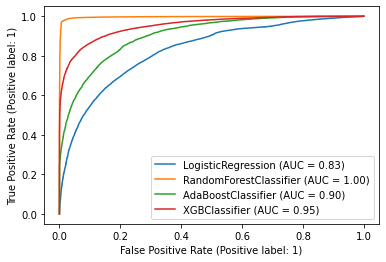

In [92]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)

ROC curve score of Randomforest is around 100% so its best model amongs all.

### Final Scoring

In [93]:
print('-'*20,'Confusion matrix','-'*20,'\n\n',confusion_matrix(y_test,y_pred))
print('-'*20,'Accuracy score','-'*20,'\n\n',accuracy_score(y_test,y_pred))
print('-'*20,'Training score','-'*20,'\n\n',rfr.score(x_train,y_train))
print('-'*20,'Classification Report','-'*20,'\n\n',classification_report(y_test,y_pred))

-------------------- Confusion matrix -------------------- 

 [[37380   208]
 [ 2069 43701]]
-------------------- Accuracy score -------------------- 

 0.9726840855106889
-------------------- Training score -------------------- 

 0.9992522123716865
-------------------- Classification Report -------------------- 

               precision    recall  f1-score   support

           0       0.95      0.99      0.97     37588
           1       1.00      0.95      0.97     45770

    accuracy                           0.97     83358
   macro avg       0.97      0.97      0.97     83358
weighted avg       0.97      0.97      0.97     83358



### Model Save

In [94]:
filename='micro_defaulter.pickle'
pickle.dump(rfr,open(filename,'wb'))

### Conclusion